# 📚 1. 선형대수 기초
- 역행렬 기반 w,b 추정

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# x = [1,2,3]
# y = [2.2, 4.4, 6.4]  
# y = wx +  b



X = np.array([[1, 1],
              [2,1],
              [3,1]])
y = np.array([[2.2], [4.4], [6.4]])

W = np.matmul(np.linalg.pinv(X), y) # 학습을 통해 w,b를 추정

print(W) # w값[2.1], b값[0.133]

[[2.1       ]
 [0.13333333]]


In [104]:
# 예측, y = wx + b = xw + b 계산은 똑같음.
# X = np.array([[1, 1],
#               [2,1],
#               [3,1]])
# W = np.array([[2.1],
#               [0.1333]])])
# X * W = 예측 = forward(신경망에서 용어 사용)
# 입력이 X, 계속 가중치 행렬과 곱해나간다.

# 예측값 p는 
p = np.matmul(X, W)
print(p) # 예측값이 나옴 3x2 * 2x1 = 3x1

# 학습이 잘되었나 확인은?
# 1. 눈으로 확인해본다.
# 2. 데이터를 넣어본다. 

[[2.23333333]
 [4.33333333]
 [6.43333333]]


## 📚 1.1. 오차계산(MSE)

In [105]:
#예측,   y = wx+b  = xw +  b  , forward


print(y)
W1 = np.array([[2.1], [0.13]])
p = np.matmul(X, W1)   #      
print(p)              # 3x1

W2 = np.array([[1], [0.1]])
p = np.matmul(X, W2)   #      
print(p)              # 3x1

[[2.2]
 [4.4]
 [6.4]]
[[2.23]
 [4.33]
 [6.43]]
[[1.1]
 [2.1]
 [3.1]]


In [106]:
abs(y - p) #  MAE

array([[1.1],
       [2.3],
       [3.3]])

In [107]:
(y - p)**2 # MSE

array([[ 1.21],
       [ 5.29],
       [10.89]])

In [108]:
# 어떤 W가 좋은지(잘 학습했는지) 확인 가능.

p = np.matmul(X,W1)
print(np.mean((y-p)**2))

p = np.matmul(X,W2)
print(np.mean((y-p)**2))

0.0022333333333333476
5.796666666666668


## 📚 1.2. 시각화(저차원데이터, 알고리즘 특성 파악할 때)
- 그래프 출력

(3,)
(3,)


(0.0, 7.0)

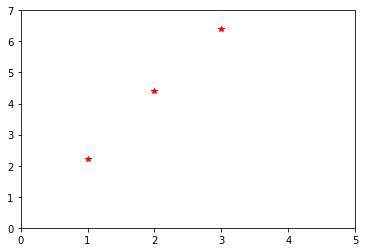

In [109]:
# 결정 경계면 ( +인지 -인지 결정되는 경계면)
# = 학습의 결과임.
# 바이너리 분류
# 원본데이터 + 학습된 데이터 출력 같이 해야함. 
x_ = X[:, 0]
y_ = y[:, 0] # y.flatten()
print(x_.shape)
print(y_.shape)
plt.plot(x_,y_, '*r') # 원본 데이터
plt.xlim(0,5)
plt.ylim(0,7)
# 학습 데이터는 직선의 방정식
# W1, W2일 때 오차함수가 얼마인지 계산을 해봤음.
# 이걸 시각화 해보자라는 것.

In [110]:
test = np.linspace(-1, 7, 10) #어디부터 어디까지를 linear하게 분할 한 것. 
# -1에서 7까지 10개의 공간으로 나눌꺼야.
# 애를 X test데이터로 보는 것

# p = np.matmul(test, W) 

# -1~7까지의 예측값이자 학습곡선이 되는 것.
# test = 50개의 원소를 가지고 있는 벡터임.  W = 2x1
# 행렬곱 불가.
# b가 있기 때문에 x는 항상 1이 붙음. Nx2

test = np.ones((10,2))
test[:,0] = np.linspace(-1, 7, 10) # decision boundary 가짜 데이터
print(test.shape)
p = np.matmul(test, W1) 
print(p.shape)
print(p)

(10, 2)
(10, 1)
[[-1.97      ]
 [-0.10333333]
 [ 1.76333333]
 [ 3.63      ]
 [ 5.49666667]
 [ 7.36333333]
 [ 9.23      ]
 [11.09666667]
 [12.96333333]
 [14.83      ]]


(0.0, 7.0)

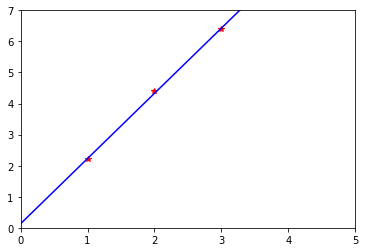

In [111]:
plt.plot(x_,y_, '*r') # 원본 데이터
plt.plot(test[:,0], p[:,0],'b')
plt.xlim(0,5)
plt.ylim(0,7)
# 3개의 점이 약간 차이가 있음.

In [112]:

test = np.ones((10,2))
test[:,0] = np.linspace(-1, 7, 10) # decision boundary 가짜 데이터
print(test.shape)
p = np.matmul(test, W2) 
print(p.shape)
print(p)

(10, 2)
(10, 1)
[[-0.9       ]
 [-0.01111111]
 [ 0.87777778]
 [ 1.76666667]
 [ 2.65555556]
 [ 3.54444444]
 [ 4.43333333]
 [ 5.32222222]
 [ 6.21111111]
 [ 7.1       ]]


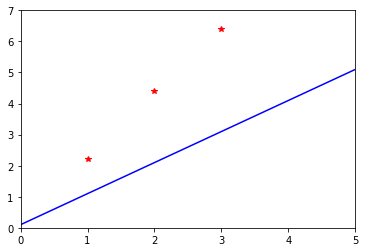

In [113]:
plt.plot(x_,y_, '*r') # 원본 데이터
plt.plot(test[:,0], p[:,0],'b')
plt.xlim(0,5)
plt.ylim(0,7)
plt.show()

---   
정리하자면 다음과 같다.

(0.0, 7.0)

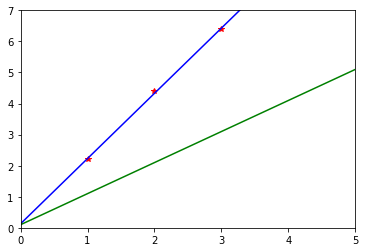

In [3]:
# X = np.array([[1, 1],
#               [2,1],
#               [3,1]])
# y = np.array([[2.2], [4.4], [6.4]])

# W1 = np.array([[2.1], [0.13]])
# p1 = np.matmul(X,W1)

# W2 = np.array([[1], [0.1]])
# p2 = np.matmul(X,W2)

# x_ = X[:, 0]
# y_ = y[:, 0]

test = np.ones((10,2))
test[:,0] = np.linspace(-1, 7, 10)

p1 = np.matmul(test, W1) 
p2 = np.matmul(test, W2) 
plt.plot(x_,y_, '*r') # 원본 데이터

plt.plot(test[:,0], p1[:,0],'b')
plt.plot(test[:,0], p2[:,0],'g')
plt.xlim(0,5)
plt.ylim(0,7)

---

# 📚2. 다차원 평면 예측 (이게 핵심이네)
- 실업률과 이자율에 따른 주가 예측
- 주가 = w1 실업률 + w2이자율 + b

In [115]:
Interest_Rate =  np.array([2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,
                      2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75 , 1.75])
Unemployment_Rate = np.array([5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,
                         5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2 , 6.1])
Stock_Index_Price = np.array([1464,1394,1357,1293,1256,1254,
                         1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719])

n = Interest_Rate.size
X = np.ones((n, 3)) #튜플로 되어있는 파라미터 하나. 
# print(X) # 24x3 행렬

X[:, 0] = Unemployment_Rate
X[:, 1] = Interest_Rate
# print(X) # inverse방식으로 풀려면 뒤에 1이 붙어야함(b)

# y를 행렬로 잘 만들기
y = Stock_Index_Price.reshape(-1,1)

# w값 찾기
W = np.matmul(np.linalg.pinv(X), y)

# mse오차 = cost는 얼마?
p = np.matmul(X,W)
print('mse cost : \n', np.mean((y-p)**2)) # 그냥 이정도 코스트가 나온다 정도.
# 시각화로 확인할 수 있다.
# 3차원 공간상에서 flatten할 수 있는 방법이 필요.

# rmse오차 : 
print('rmse cost : \n', np.sqrt(np.mean((y-p)**2))) 

print(y), print(p)

mse cost : 
 4356.611357123126
rmse cost : 
 66.00463133086288
[[1464]
 [1394]
 [1357]
 [1293]
 [1256]
 [1254]
 [1234]
 [1195]
 [1159]
 [1167]
 [1130]
 [1075]
 [1047]
 [ 965]
 [ 943]
 [ 958]
 [ 971]
 [ 949]
 [ 884]
 [ 866]
 [ 876]
 [ 822]
 [ 704]
 [ 719]]
[[1422.86238865]
 [1336.47736689]
 [1336.47736689]
 [1336.47736689]
 [1311.46270976]
 [1261.43339548]
 [1286.44805262]
 [1200.06303087]
 [1200.06303087]
 [1175.04837373]
 [1063.64869484]
 [1013.61938057]
 [ 988.60472343]
 [ 927.23435882]
 [ 952.24901595]
 [ 877.20504454]
 [ 852.1903874 ]
 [ 877.20504454]
 [ 877.20504454]
 [ 877.20504454]
 [ 927.23435882]
 [ 852.1903874 ]
 [ 852.1903874 ]
 [ 877.20504454]]


(None, None)

---
# 3차원 그래프

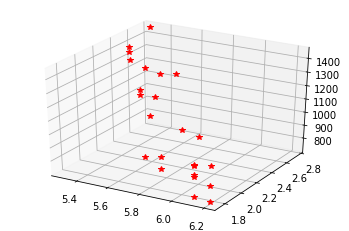

In [116]:
# %matplotlib qt5  # colab에서는 안됨. 
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(X[:,0], X[:,1], y[:,0], 'r*') 
# X(:, Unemployment_Rate,Interest_Rate), y(:, Stock_Index_Price)


In [117]:
# linspace 가상의 데이터 테스트데이터로 예측, 결과값 그려보기 = 학습곡선(직선)
xx, yy = np.mgrid[-1:3:1, 10:13:1] 
print(data.shape)
# -1~3 간격 1, 100~110 간격 1
print('np.mgrid') 
print(xx, yy)

print('.flatten()') # 2차원 데이터를 vector로 바꿔주는 함수
xx = xx.flatten()
yy = yy.flatten()
print(xx, yy)

print('np.c_')
data = np.c_[xx, yy] # concatrate
print(data)


(12, 2)
np.mgrid
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]
 [ 2  2  2]] [[10 11 12]
 [10 11 12]
 [10 11 12]
 [10 11 12]]
.flatten()
[-1 -1 -1  0  0  0  1  1  1  2  2  2] [10 11 12 10 11 12 10 11 12 10 11 12]
np.c_
[[-1 10]
 [-1 11]
 [-1 12]
 [ 0 10]
 [ 0 11]
 [ 0 12]
 [ 1 10]
 [ 1 11]
 [ 1 12]
 [ 2 10]
 [ 2 11]
 [ 2 12]]


https://colab.research.google.com/drive/13SmvGvUnnVf-VyvBID4sEhzqQr6EWNKo?usp=sharing#scrollTo=X8BF9qJpGHnA

In [127]:
xx, yy = np.mgrid[-1:2:0.1,  10:13:0.1]
data = np.c_[xx.flatten(), yy.flatten()]
print(data.shape)

(900, 2)


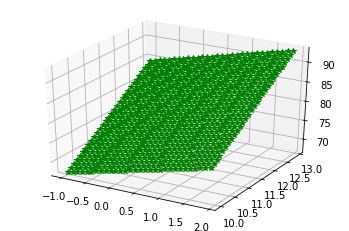

In [128]:
z = 3* data[:,0] +6*data[:, 1] +10

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(data[:,0], data[:,1],  z, 'g*')

In [133]:
xx, yy = np.mgrid[5:7:0.05,  1:3:0.05]
data = np.c_[xx.flatten(), yy.flatten(), np.ones(xx.size)]

#print(data.shape)
p = np.matmul(test, W) # test데이터 예측값 1600x2, 3x1 # 학습모델에 대한 평면의 방정식


In [135]:
n

24

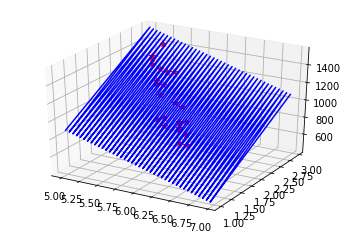

In [132]:
n = Interest_Rate.size # 24
X = np.ones((n, 3)) # (24,3) 
X[:, 0] = Unemployment_Rate # 실업율
X[:, 1] = Interest_Rate # 이자율
y = Stock_Index_Price.reshape(-1, 1) # 주식가격 reshape 

W = np.matmul(np.linalg.pinv(X), y)    # W = X역행렬 * y  

xx, yy = np.mgrid[5:7:0.05,  1:3:0.05] # 
test = np.c_[xx.flatten(), yy.flatten(),  np.ones( xx.size )  ] #
p = np.matmul(test, W)  # 확률

fig = plt.figure() 
ax = plt.axes(projection='3d')
ax.plot(X[:,0], X[:, 1],  y[:,0], 'r*' )  # 실제값
ax.plot(test[:,0], test[:, 1],  p[:,0], 'b' ) # test데이터 예측값

---
# 경사하강법 cost

In [139]:
# 예측

# 데이터가 주어졌을 때
# x = [1,2,3]
# y = [2.2, 4.4, 6.4]  
# y = wx +  b



X = np.array([[1, 1],
              [2,1],
              [3,1]])
y = np.array([[2.2], [4.4], [6.4]])

W = np.matmul(np.linalg.pinv(X), y) # 학습을 통해 w,b를 추정

print(W) # w값[2.1], b값[0.133]

[[2.1       ]
 [0.13333333]]


[ 2.8 11.2 25.8]
2.1571428571428575 0.00476190476190477


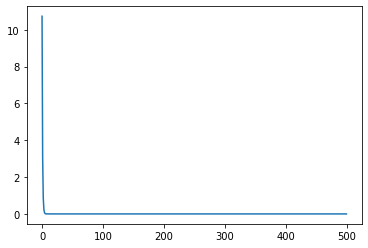

In [148]:
#예측,   y = wx+b  = xw +  b  , forward


x = np.array([1,2,3])
y = np.array([2.2, 4.4, 6.4])
# y = wx
# cost =  (wx - y)^2,       cost'=(wx-y)x
# 변수가 2개라서(w,b) 미분 안됨. 편미분 해야 함.
# 미분 2개 계산.
# cost / dw  =  2(wx + b - y)x    오차 * 입력   오차*(이전 층에서의 출력)
# cost / db  =  2(wx + b - y)1    오차 * 1      
# 각각 진행.


w = 5
costs = []
d = (w*x - y)*x
print(d)
for i in range(500) :
  d = np.mean((w*x - y)*x)
  w = w - 0.1 * d
  cost = np.mean((w*x - y)**2)
  costs.append(cost)
plt.plot(costs) 
print(w, cost) # 최종

[ 2.8 11.2 25.8]
2.1571428571428575 0.019047619047618536 0.00476190476190477


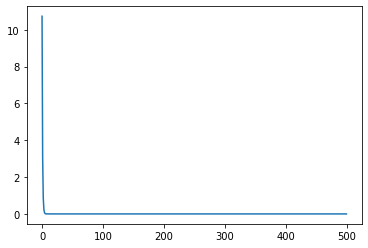

In [149]:
#예측,   y = wx+b  = xw +  b  , forward


x = np.array([1,2,3])
y = np.array([2.2, 4.4, 6.4])
# y = wx
# cost =  (wx - y)^2,       cost'=(wx-y)x
# 변수가 2개라서(w,b) 미분 안됨. 편미분 해야 함.
# 미분 2개 계산.
# cost / dw  =  2(wx + b - y)x    오차 * 입력   오차*(이전 층에서의 출력)
# cost / db  =  2(wx + b - y)1    오차 * 1      
# 각각 진행.


w = 5
b = 1 # 랜덤하게 시작
costs = []
d = (w*x - y)*x
print(d)
for i in range(500) :
  d = np.mean((w*x - y)*x)
  db = np.mean((w*x + b - y))
  w = w - 0.1 * d
  b = b - 0.1*db

  cost = np.mean((w*x - y)**2) # 다 상수가 되었으니 cost값 계산 가능
  costs.append(cost)
plt.plot(costs) 
print(w, b, cost) # 최종

8.881784197001252e-16
2.1000000000000028 0.133333333333328 0.0022222222222222066


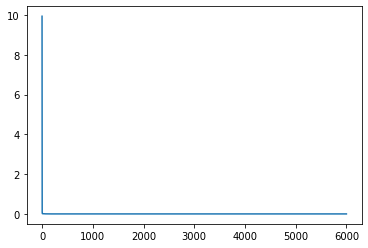

In [150]:
x = np.array([1,2,3])
y = np.array([2.2, 4.4, 6.4])
# y = wx + b
# cost =  (wx + b - y)^2,  
#  cost / dw    =      (wx + b - y)x      ,   오차*입력 ,      오차*(이전층에서의 출력)
#  cost / db    =      (wx + b - y)1          오차*1

w = 5
b = 1
costs = []
print(d)
for i in range(6000) :
  p = w*x + b      # 예측
  err = p - y      # 에러계산
  d = np.mean(err*x)  # 미분(w) 평균
  db = np.mean(err)   # 미분(b) 평균
  w = w - 0.1 * d     # w 경사하강법
  b = b - 0.1* db     # b 경사하강법

  p = w*x + b
  err = p - y
  cost = np.mean(err**2)
  costs.append(cost)
plt.plot(costs)
print(w, b, cost)

# 주가예측에 대한 경사 하강법

In [152]:
# 결과가 잘 안나올 것.
# 인사이트 제공해줄 것.
# 이걸 한 번 해보세용
# 잘됐따 안됐따 RMSE 오차로 확인 해봐야함. 
# 아까 주식데이터 그대로 가져올 것.
# 문제점을 발견하는게 첫번쨰 목적
# 

Interest_Rate =  np.array([2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,
                      2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75 , 1.75])
Unemployment_Rate = np.array([5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,
                         5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2 , 6.1])
Stock_Index_Price = np.array([1464,1394,1357,1293,1256,1254,
                         1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719])

n = Interest_Rate.size
X = np.ones((n, 2))
X[:, 0] = Unemployment_Rate
X[:, 1] = Interest_Rate
y = Stock_Index_Price.reshape(-1, 1)

# 일단 이자율에 대해 계산
# 실업률 w 계산
# 동시에 고려 했을 때 각각 w 제대로 나오는지 확인.

# 수식
# y = w*실업률 + b

x = X[:,0] # 실업률



/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


nan nan nan


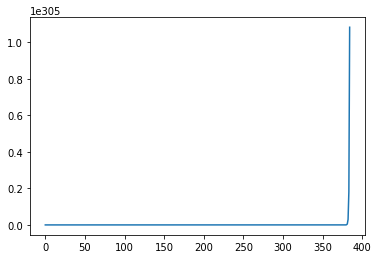

In [153]:
x = X[:, 0]


w = 5
b = 1
costs = []
for i in range(6000) :
  p = w*x + b      # 예측
  err = p - y      # 에러계산
  d = np.mean(err*x)  # 미분(w) 평균 
  db = np.mean(err)   # 미분(b) 평균 
  w = w - 0.1 * d     # w 경사하강법
  b = b - 0.1* db     # b 경사하강법

  p = w*x + b
  err = p - y
  cost = np.mean(err**2)
  costs.append(cost)
plt.plot(costs)
print(w, b, cost)

# 안됨.

# y = w*실업률 +  b

w=88.19937500000002    w2=31.658866567460315  b=107.90833333333333  cost=817028.5029961824
w=160.79011604449482    w2=57.730294339931376  b=195.91186786504096  cost=567373.2275293269
w=220.53289508192356    w2=79.20251757440603  b=268.3542571337877  cost=398220.19111384475
w=269.700109408331    w2=96.88898346869746  b=327.9877692134558  cost=283611.1421041931
w=310.1622418506703    w2=111.45926640692613  b=377.0778839042755  cost=205958.16535064092
w=343.4589465932994    w2=123.46451446283788  b=417.4893900232245  cost=153344.63551422668
w=370.8575621933025    w2=133.35839522982235  b=450.75725483497496  cost=117696.48820127867
w=393.40127551317033    w2=141.51433700292029  b=478.14495894512305  cost=93543.17164240131
w=411.9487669928578    w2=148.23972054667206  b=500.69251361488415  cost=77178.13419240614
w=427.2068439400699    w2=153.7875607927283  b=519.2559853472011  cost=66090.01581346948
427.2068439400699 153.7875607927283 519.2559853472011 66090.01581346948


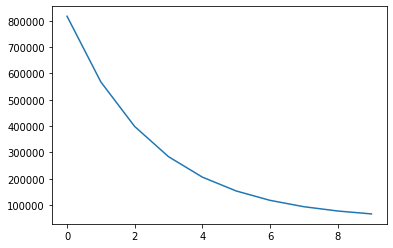

In [155]:
# -250.14657137, 345.54008701, 1798.40397763]
# -250.14657137, 345.54008701, 1798.40397763]
#  (wx + w2x2 +  b - y)^2   -> w에 대해서 미분      (wx + w2x2 +  b - y)x
#  (wx + w2x2 +  b - y)^2   -> w2에 대해서 미분     (wx + w2x2 +  b - y)x2
#  (wx + w2x2 +  b - y)^2   -> b에 대해서 미분      (wx + w2x2 +  b - y)

# 경사하강법을 직접 해본 것.

x = X / 7
w = 0
w2 = 0
b = 1

costs = []
for i in range(10) :
  p = w*x[:, 0]  + w2*x[:, 1] + b      # 예측
  err = p - y      # 에러계산

  d = np.mean(err*x[:,0])     # 미분(w) 평균    
  dw2 = np.mean(err*x[:,1])   # 미분(w2) 평균 
  db = np.mean(err)           # 미분(b) 평균 

  w = w - 0.1 * d         # w 경사하강법
  w2 = w2 - 0.1 * dw2     # w2 경사하강법
  b = b - 0.1* db         # b 경사하강법

  p = w*x[:, 0]  + w2*x[:, 1] + b   
  err = p - y   
  cost = np.mean(err**2)
  costs.append(cost)
  print(f"w={w}    w2={w2}  b={b}  cost={cost}")
plt.plot(costs)
print(w, w2, b, cost)

In [156]:
x = X[:, 0] / 7
w = 0
w2 = 0
b = 1


In [157]:
 x.shape

(24,)